<a href="https://colab.research.google.com/github/evelinafischer/AH2179/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Assignment 4: Bike Sharing Demand**

In [29]:
# Code from the tutorial

# Import the load function from the json library
from json import load

# Import pandas for data manipulation and analysis
import pandas as pd

# Import train_test_split to divide the dataset into training and test sets
from sklearn.model_selection import train_test_split

# Enable inline plotting so that charts appear directly in the notebook
%matplotlib inline

# Import matplotlib for creating plots
import matplotlib.pyplot as plt

# Import seaborn for more advanced and visually appealing plots
import seaborn as sns

# Import Sequential model from Keras to build neural networks layer by layer
from tensorflow.keras.models import Sequential

# Import Dense, fully connected layers
from tensorflow.keras.layers import Dense

# Import Dropout, regularization to prevent overfitting
from tensorflow.keras.layers import Dropout

# Import useful callbacks:
# - EarlyStopping: stop training when validation performance stops improving
# - ReduceLROnPlateau: reduce learning rate when model stops improving
# - ModelCheckpoint: save the best model during training
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Import function to load a previously saved Keras model from disk
from keras.models import load_model

# Import StandardScaler from scikit-learn to standardize features
from sklearn.preprocessing import StandardScaler

# Import evaluation metrics from scikit-learn to assess model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

####**Data Preprocessing**

In [30]:
# Code from the tutorial

# Import the pandas library for data manipulation and analysis
import pandas as pd
# Import TensorFlow for building and training neural networks
import tensorflow as tf


# Define the URL for the bikesharing dataset stored on GitHub
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7BikeSharing.csv'

# Read the CSV data from the URL into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 10 rows of the DataFrame to check the data
df.head(10)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


####**Feature engineering**

In [31]:
# Code from the tutorial

# Define the target variable, what we want to predict as 'cnt', bike rental counts
target = 'cnt'

# Define the feature variables, input predictors, to be used in the model
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

# Create the feature matrix X by selecting the chosen columns from the DataFrame
X = df[features].copy()


# Create the target vector y, converting the 'cnt' column values to float type
y = df[target].astype(float)

# ---------------- Train/Test Split ----------------
# Split the data into training and testing sets
# 80% training data, 20% testing data
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- Feature Scaling ----------------
# Neural networks work better when input features are standardized
# Initialize a StandardScaler to normalize data (mean=0, std=1)
scaler = StandardScaler()


# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler, already fitted, to transform the test data
X_test_scaled = scaler.transform(X_test)

####**Neural Network Construction**

In [83]:
# Code from the tutorial

# Define a function to construct the neural network model
def construct_network_model():

  # Create a Sequential model, which is a linear stack of layers
  model = Sequential()

  # Add a Dense, fully connected, layer with 32 units and ReLU activation
  model.add(Dense(32, activation='relu', input_dim=11))

  # Optional Dropout Layer, dropout helps prevent overfitting by randomly turning off neurons during training
  # model.add(Dropout(0.3))

  # Add another Dense layer with 64 units and ReLU activation
  model.add(Dense(64, activation='relu'))

  # Another chance to add dropout after this layer
  # model.add(Dropout(0.3))

  # Add another Dense layer with 64 units and ReLU activation
  model.add(Dense(128, activation='relu'))

  # Another chance to add dropout after this layer
  # model.add(Dropout(0.3))

  # Add the output layer with 1 unit
  model.add(Dense(1))

  # Return the constructed model
  return model

# Call the function to create the model
model=construct_network_model()

# Compile the model using:
# - 'adam' optimizer for training
# - 'mae' Mean Absolute Error as the loss function
# - 'mae' as an additional metric to track during training
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####**Training of the Model**

In [106]:
# Code from the tutorial

# EarlyStopping: stops training if validation MAE doesn't improve for 5 epochs
# restore_best_weights=True ensures the model returns to the best state after stopping
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# ReduceLROnPlateau: reduces learning rate by a factor of 0.5 if val_mae doesn't improve for 3 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.1, patience=3)

# Define the file path to save the best model weights
filepath = "weights.best.keras"

# ModelCheckpoint: saves the model weights only when validation MAE improves
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the neural network on the scaled training data
# - validation_split=0.2 reserves 20% of training data for validation
# - epochs=200 sets the maximum number of training iterations
# - batch_size=32 specifies how many samples are used per update
# - callbacks=[...] applies the EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint functions
hist_2 = model.fit(X_train_scaled,
                   y_train,
                   validation_split=0.9,
                   epochs=200, batch_size=32,
                   callbacks=[early_stop, reduce_lr,checkpoint],verbose=0
                  )



Epoch 1: val_mae improved from inf to 26.80338, saving model to weights.best.keras

Epoch 2: val_mae did not improve from 26.80338

Epoch 3: val_mae did not improve from 26.80338

Epoch 4: val_mae did not improve from 26.80338

Epoch 5: val_mae did not improve from 26.80338

Epoch 6: val_mae did not improve from 26.80338


####**Evaluation of the Model**

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Results of the Trained Model
Mean Absolute Error: 28.389415640551146
Mean Squared Error: 2166.3358864902184
R-squared: 0.931586681016959
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
This is Results of the Model Loaded from the Local Path
Mean Absolute Error: 28.389415640551146
Mean Squared Error: 2166.3358864902184
R-squared: 0.931586681016959


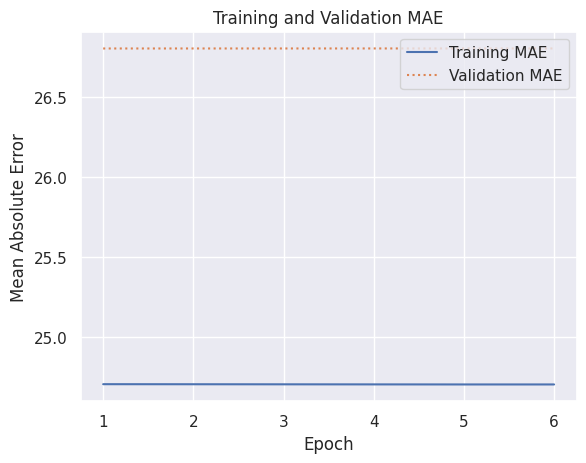

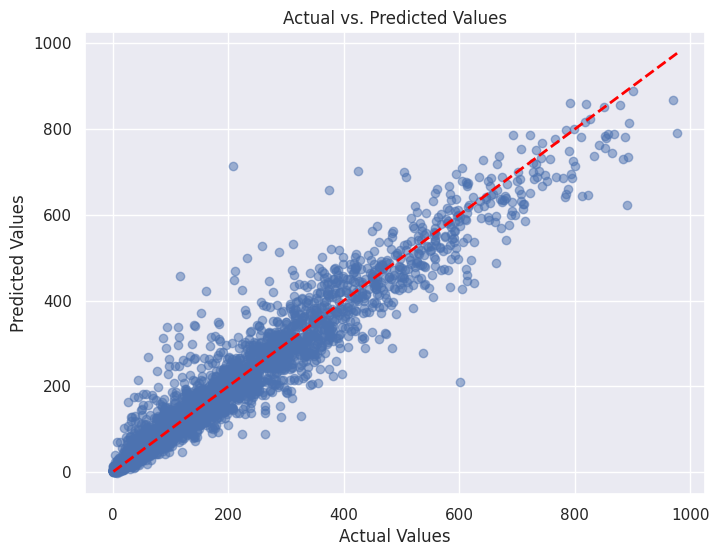

In [107]:
# Code of the tutorial

# Set the style of the plots using Seaborn for better visualization
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history
err = hist_2.history['mae'] # training MAE over epochs
val_err = hist_2.history['val_mae'] # validation MAE over epochs

# Define the range of epochs for plotting
epochs = range(1, len(err) + 1)

# Plot Training MAE and Validation MAE to visualize model performance during training
plt.plot(epochs, err, '-', label='Training MAE') # Solid line for training
plt.plot(epochs, val_err, ':', label='Validation MAE') # Dotted line for validation
plt.title('Training and Validation MAE') # Plot title
plt.xlabel('Epoch') # X-axis label
plt.ylabel('Mean Absolute Error') # Y-axis label
plt.legend(loc='upper right') # Display legend
plt.plot() # Render the plot

# Use the trained model to predict values on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
# Mean Absolute Error, MAE -  average absolute difference between predicted and true values
# Mean Squared Error, MSE -  average squared difference between predicted and true values
# R-squared, R2 - proportion of variance in the dependent variable explained by the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics for the trained model
print('Results of the Trained Model')
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load Pre-trained Model and Evaluate
if not filepath =="":

  # Load the best saved model from the specified file path
  model = load_model(filepath)

  # Predict on the test set using the loaded model
  y_pred = model.predict(X_test_scaled)

  # Calculate evaluation metrics for the loaded model
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the metrics for the loaded model
  print('This is Results of the Model Loaded from the Local Path')
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # Create a scatter plot to visualize predicted vs. actual values
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a reference diagonal line for perfect predictions
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Display the plot
  plt.show()

####**Results**

**Single Hidden Layer (32 Units)**
*  Mean Absolute Error: 74.74472219149729
*  Mean Squared Error: 13498.679594234856
*  R-squared: 0.5737090085201677


**Single Hidden Layer (32 Units) with Dropout Rate 0.3**

*   Mean Absolute Error: 79.79261021921357
*   Mean Squared Error: 15056.069085470615
*   R-squared: 0.5245263380445526


**Single Hidden Layer (32 Units) with Dropout Rate 0.5**

*  Mean Absolute Error: 84.82786313656148
*  Mean Squared Error: 17103.83451125771
*  R-squared: 0.4598574978381573

**Single Hidden Layer (32 Units) with Dropout Rate 0.8**

*  Mean Absolute Error: 93.51758827946402
*  Mean Squared Error: 20694.228878119153
*  R-squared: 0.34647212827159246


**Two Hidden Layers (32 + 64 Units)**

*  Mean Absolute Error: 35.61757678983967
*  Mean Squared Error: 3521.794814748669
*  R-squared: 0.8887810179590502


**Two Hidden Layers (32 + 64 units) with dropout rate 0.3 after the frist hidden layer**

*  Mean Absolute Error: 48.649223645208075
*  Mean Squared Error: 6321.628416023619
*  R-squared: 0.8003617149054539

**Two Hidden Layers (32 + 64 units) with dropout rate 0.5 after the frist hidden layer**

*  Mean Absolute Error: 67.64462268427957
*  Mean Squared Error: 12625.662516018541
*  R-squared: 0.6012790618171291


**Two Hidden Layers (32 + 64 units) with dropout rate 0.3 after the frist hidden layer and the second hidden layer**

*  Mean Absolute Error: 73.05745328748459
*  Mean Squared Error: 14441.83576368825
*  R-squared: 0.5439239487452604

**Three Hidden Layers (32 + 64 + 128 units )**

*  Mean Absolute Error: 28.50901849963997
*  Mean Squared Error: 2196.8810189439287
*  R-squared: 0.930622059647315

**Three Hidden Layers (32 + 64 + 128 units) with dropout rate 0.3 after the frist hidden layer**

*  Mean Absolute Error: 49.57791414704727
*  Mean Squared Error: 6791.041107180553
*  R-squared: 0.7855375685784333

**Three Hidden Layers (32 + 64 + 128 units) with dropout rate 0.5 after the frist hidden layer**

*  Mean Absolute Error: 71.40876042853154
*  Mean Squared Error: 14793.20804966218
*  R-squared: 0.5328275419359356

**Three Hidden Layers (32 + 64 + 128 units) with dropout rate 0.3 after the frist and second hidden layer**

*  Mean Absolute Error: 61.61098787768115
*  Mean Squared Error: 11121.25984514124
*  R-squared: 0.6487883979470933

**Three Hidden Layers (32 + 64 + 128 units) with dropout rate 0.3 after the frist, second and third hidden layer**

* Mean Absolute Error: 62.84822902868751
* Mean Squared Error: 11059.748386810015
* R-squared: 0.6507309420586365


*The results above show that the best configuration is the three-hidden-layer network (32 → 64 → 128) without dropout. This configuration will be used for further evaluation.”*

**Early Stopping Patience, 10**
*  Mean Absolute Error: 28.404949344068733
*  Mean Squared Error: 2170.78083470969
*  R-squared: 0.9314463086664393

**Early Stopping Patience, 50**
*  Mean Absolute Error: 28.415819744387658
*  Mean Squared Error: 2170.5488305757385
*  R-squared: 0.9314536354032211

**Early Stopping Patience, 100**
*  Mean Absolute Error: 28.382688115403415
*  Mean Squared Error: 2167.8975847080974
*  R-squared: 0.9315373622760373

**Learning Rate Reduction Factor, 0.1**
*  Mean Absolute Error: 28.396104493353118
*  Mean Squared Error: 2166.8487222531076
*  R-squared: 0.9315704855613737

**Learning Rate Reduction Factor, 0.5**
*  Mean Absolute Error: 28.395384598463362
*  Mean Squared Error: 2166.532633752036
*  R-squared: 0.9315804676992248

**Learning Rate Reduction Factor, 0.9**
*  Mean Absolute Error: 28.395345787180137  
*  Mean Squared Error: 2166.4972010170554
*  R-squared: 0.9315815866720562

**Validation split, 0.1**
*  Mean Absolute Error: 28.389241282561294
*  Mean Squared Error: 2166.3695288609983  
*  R-squared: 0.9315856185841858

**Validation split, 0.5**
*  Mean Absolute Error: 28.389329109966788
*  Mean Squared Error: 2166.3377881856472
*  R-squared: 0.9315866209610384

**Validation split, 0.9**
*  Mean Absolute Error: 28.389415640551146
*  Mean Squared Error: 2166.3358864902184
*  R-squared: 0.931586681016959